In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, dstn, idstn, fftshift, ifftshift

from classicalfield_orig import FiniteTempGPE as gpe 

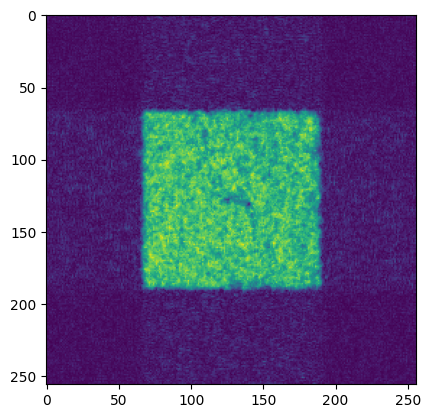

In [9]:
imported_data = np.loadtxt('vortexout.csv', dtype = np.complex_)
plt.imshow(np.abs(imported_data))

In [7]:
print(100/(0.0007/5))

714285.7142857143


In [11]:
print(1000/g.gpeobj.dt)

2621440.0


Total Imag Time:  1.915360450744629
kmax:  8.042477193189871
T:  3.2340719701489613


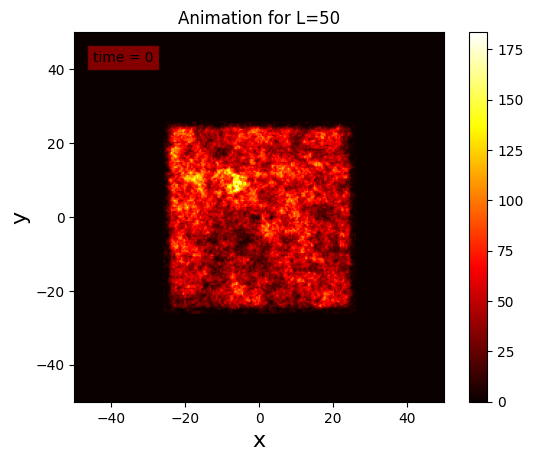

In [3]:
g = gpe(npoints = 2**7, vortex = True, numRealSteps = 300000, Nsamples = 1, runAnim = True, animFileName = 'vortex_longanim_pt2.mp4', Tfact = 1/10, dst = False, dtcoef = 0.0025)

In [4]:
## Figure out what dt is relative to T, kmax, and V 

In [4]:
print("Temperature: ", g.T)
# KE ~ 32 
print("dt: ", g.gpeobj.dt)
print("PE: ", np.max(g.gpeobj.Vbox))
# Eventually increase V once you can reproduce earlier results in the other file 
print("KE: ", (np.pi/g.dx)**2/2)
print("Interaction Energy: " , g.gpeobj.g * 50)
print("Total Time: ", g.gpeobj.dt * 264000)
print("Number of Atoms", g.gpeobj.Natoms)

Temperature:  3.2340719701489613
dt:  0.0003814697265625
PE:  10.0
KE:  32.34071970148961
Interaction Energy:  0.9765625
Total Time:  100.7080078125
Number of Atoms 128000


In [13]:
print(g.gpeobj.dt * 50000)

38.14697265625


In [8]:
saved_file = np.savetxt('vortexout.csv', g.snaps[-1])

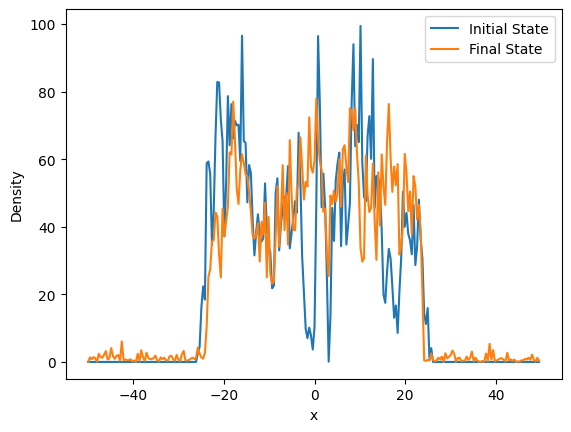

In [5]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0])[len(g.snaps[0])//2]**2, label = 'Initial State')
plt.plot(g.xi[0][0], np.abs(g.snaps[-1])[len(g.snaps[-1])//2]**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

In [41]:
print(np.sum(np.abs(g.snaps[0])**2)*g.dx**2)
print(np.sum(np.abs(g.snaps[-1])**2)*g.dx**2)

128000.0
128000.0


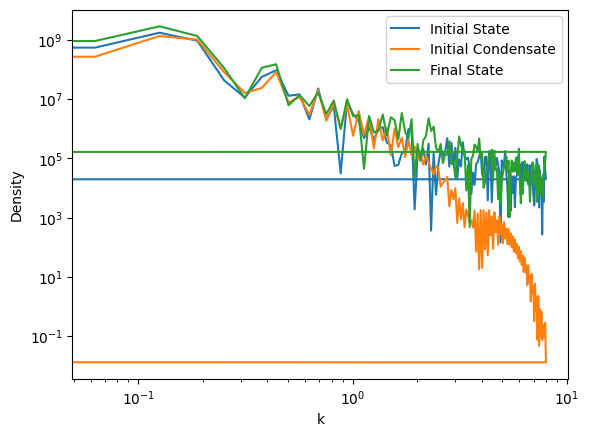

In [6]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0]))[0]**2, label = 'Initial State')
plt.plot(g.ki[0][0], np.abs(fft2(g.gs))[0]**2, label = 'Initial Condensate')
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1]))[0]**2, label = 'Final State')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('Density')
plt.legend() 


In [6]:
print(g.gpeobj.dt)
print(g.gpeobj.kmax**2/2)
print(g.T)
print(np.max(g.gpeobj.Vbox))
print(g.gpeobj.g*100) 

0.00762939453125
32.34071970148961
32.34071970148961
10.0
1.953125


In [12]:
g_2 = gpe(npoints = 2**7, numRealSteps = 264000, vortex = True, Nsamples = 1, runAnim = True, animFileName = 'fewerpoint_longsim_higherpot_smallerdt_vortex.mp4', Tfact = 1/2, dst = False, dtcoef = 0.0025)

Total Imag Time:  60.976295948028564
kmax:  32.169908772759484
T:  258.7257576119169


ValueError: operands could not be broadcast together with shapes (1024,1024) (256,256) 

In [44]:
print("Temperature: ", g_2.T)
# KE ~ 32 
print("dt: ", g_2.gpeobj.dt)
print("PE: ", np.max(g_2.gpeobj.Vbox))
# Eventually increase V once you can reproduce earlier results in the other file 
print("KE: ", (np.pi/g_2.dx)**2/2)
print("Interaction Energy: " , g_2.gpeobj.g * 50)
print("Total Time: ", g_2.gpeobj.dt * 132000)
print("Number of Atoms", g_2.gpeobj.Natoms)

Temperature:  16.170359850744806
dt:  0.000762939453125
PE:  10.0
KE:  32.34071970148961
Interaction Energy:  0.9765625
Total Time:  100.7080078125
Number of Atoms 128000


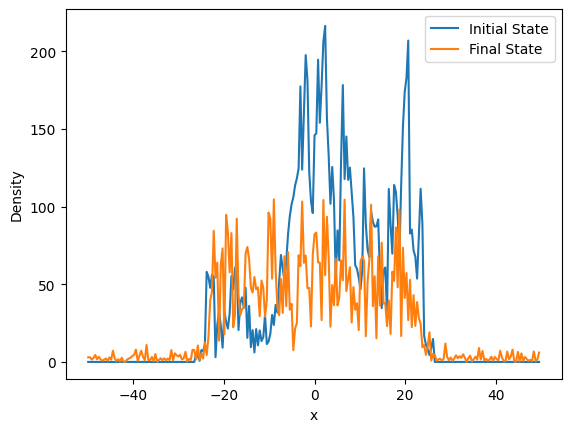

In [45]:
plt.figure() 
plt.plot(g_2.xi[0][0], np.abs(g_2.snaps[0])[len(g_2.snaps[0])//2]**2, label = 'Initial State')
plt.plot(g_2.xi[0][0], np.abs(g_2.snaps[-1])[len(g_2.snaps[-1])//2]**2, label = 'Final State')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

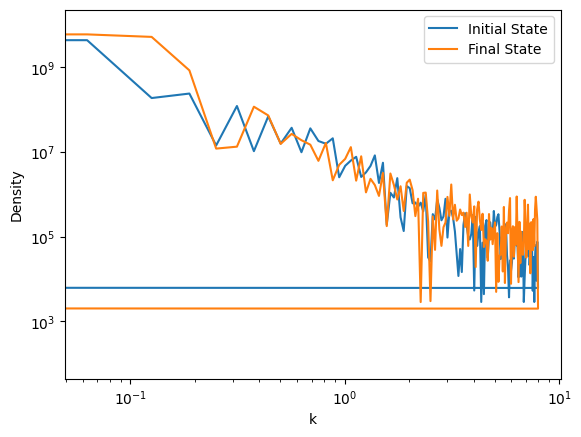

In [46]:
plt.figure() 
plt.plot(g_2.ki[0][0], np.abs(fft2(g_2.snaps[0]))[0]**2, label = 'Initial State')
plt.plot(g_2.ki[0][0], np.abs(fft2(g_2.snaps[-1]))[0]**2, label = 'Final State')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('Density')
plt.legend() 